In [1]:
import torch
import torchvision

In [2]:
device = "cuda" if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [3]:
from torchvision import datasets

In [4]:
transform = torchvision.transforms.ToTensor()

In [5]:
train_data = datasets.MNIST(root="train_data",
                            train=True,
                            download=True,
                            transform=transform)

test_data = datasets.MNIST(root="test_data",
                           train=False,
                           download=True,
                           transform=transform)

In [6]:
len(train_data), len(test_data)

(60000, 10000)

In [7]:
img, label = train_data[0]

In [8]:
img

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [9]:
label

5

In [10]:
img.shape

torch.Size([1, 28, 28])

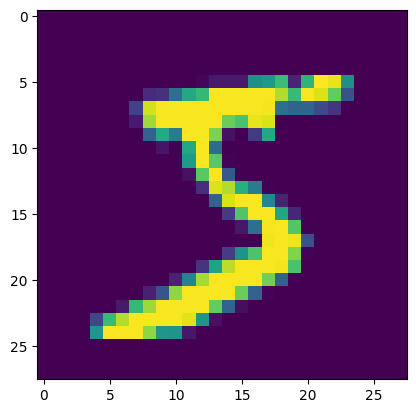

In [11]:
import matplotlib.pyplot as plt

permuted_image = img.permute(1,2,0)
plt.imshow(permuted_image);

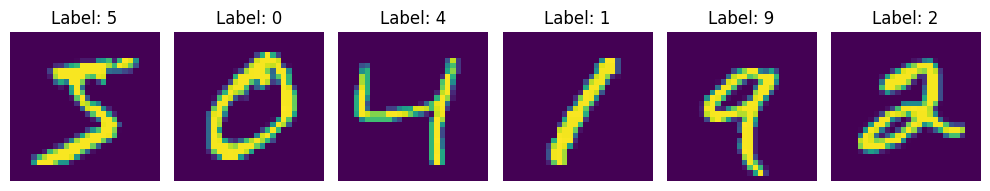

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(10,5))

for i in range(6):
    img, label = train_data[i]
    axes[i].imshow(img.squeeze())
    axes[i].set_title(f"Label: {label}")
    axes[i].axis("off")

plt.tight_layout()
plt.show()

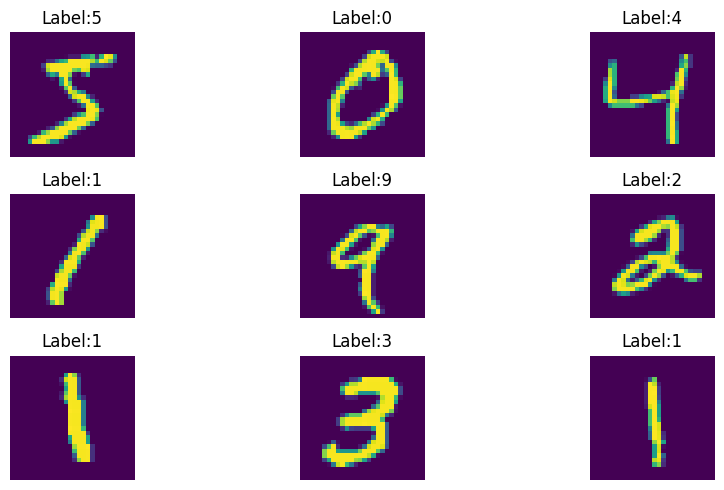

In [13]:
fig, axes = plt.subplots(nrows=3, ncols= 3, figsize=(10,5))

for i, ax in enumerate(axes.flat):
    img, label = train_data[i]
    ax.imshow(img.squeeze())
    ax.set_title(f"Label:{label}")
    ax.axis("off")

plt.tight_layout()
plt.show()

In [14]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data, shuffle=True, batch_size=32)
test_dataloader = DataLoader(test_data, batch_size=32)

In [15]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

In [16]:
img, label = next(iter(train_dataloader))

img.shape, label.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [17]:
for batch in train_dataloader:
    images, labels = batch

images.shape, label.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [18]:
from torch import nn

In [59]:
class MNISTModel(nn.Module):

    def __init__ (self,
                  input_shape:int,
                  hidden_units:int,
                  output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [60]:
model = MNISTModel(784, 10, 10).to(device)

In [61]:
model.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0323, -0.0303,  0.0276,  ...,  0.0069,  0.0097,  0.0137],
                      [ 0.0196, -0.0081,  0.0198,  ..., -0.0214, -0.0112, -0.0170],
                      [-0.0243,  0.0281, -0.0319,  ..., -0.0091, -0.0184, -0.0075],
                      ...,
                      [ 0.0303,  0.0118,  0.0150,  ..., -0.0141, -0.0112,  0.0124],
                      [ 0.0062, -0.0131,  0.0070,  ...,  0.0321,  0.0080,  0.0258],
                      [ 0.0155,  0.0056, -0.0105,  ..., -0.0013,  0.0105, -0.0211]],
                     device='cuda:0')),
             ('layer_stack.1.bias',
              tensor([ 0.0281,  0.0169,  0.0215,  0.0165, -0.0344, -0.0065,  0.0186,  0.0177,
                      -0.0325, -0.0202], device='cuda:0')),
             ('layer_stack.3.weight',
              tensor([[ 0.2305, -0.2618,  0.2397, -0.0610,  0.0232,  0.1542,  0.0851, -0.2027,
                        0.1030, -0.2715],
                      [-0

In [62]:
model

MNISTModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [69]:
epochs = 5
learning_rate = 0.01

In [70]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(params=model.parameters(),
                             lr=learning_rate)

In [71]:
rand_img_tensor = torch.randn(1, 1, 28, 28).to(device)
model(rand_img_tensor)

tensor([[ -4.0539, -10.7647,  -8.4207,  -3.0348,  -3.2927,   3.1639,   2.9642,
          -2.8150,  -4.5751,  -2.2661]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [72]:
rand_img_tensor

tensor([[[[-2.3169e+00, -2.1680e-01, -1.3847e+00, -8.7124e-01, -2.2337e-01,
            1.7174e+00,  3.1888e-01, -4.2452e-01, -8.2855e-01,  3.3090e-01,
           -1.5576e+00,  9.9564e-01, -8.7979e-01, -6.0114e-01, -1.2742e+00,
            2.1228e+00, -1.0892e+00, -3.5529e-01, -9.1382e-01, -6.5814e-01,
            7.8024e-02,  5.2581e-01, -4.8799e-01,  1.1914e+00, -1.3864e+00,
           -1.2862e+00, -1.4032e+00,  3.6004e-02],
          [-6.3477e-02,  6.7561e-01, -9.7807e-02,  1.8446e+00,  1.3852e+00,
           -4.4585e-01,  1.4451e+00,  8.5641e-01,  2.2181e+00,  5.2317e-01,
            3.4665e-01, -1.9733e-01, -4.5275e-01, -7.7178e-01, -1.7219e-01,
            5.2379e-01,  5.6622e-02,  4.2630e-01,  5.7501e-01, -6.4172e-01,
            3.3832e-01,  1.6992e+00,  1.0868e-02, -3.3874e-01, -1.3407e+00,
           -5.8537e-01,  5.3619e-01,  5.2462e-01],
          [-1.4692e+00,  1.4332e+00,  7.4395e-01, -4.8158e-01, -1.0495e+00,
            6.0390e-01, -1.7223e+00, -8.2777e-01, -4.9765e-01,

In [73]:
from helper_functions import accuracy_fn
from timeit import default_timer as timer

In [74]:
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Model training
for epoch in tqdm(range(epochs)):
    model.train()
    train_loss = 0
    train_acc = 0

    for batch in train_dataloader:
        X, y = batch
        X = X.to(device)
        y = y.to(device)

        # Forward pass
        y_pred = model(X)

        # Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # Backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Divide total train loss by length of train dataloader
    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)

    ### Testing
    model.eval()
    test_loss = 0
    test_acc = 0
    
    with torch.inference_mode():
        for batch in test_dataloader:
            X, y = batch
            X = X.to(device)
            y = y.to(device)
    
            y_test_pred = model(X)
            loss = loss_fn(y_test_pred, y)
            test_loss += loss.item()
            test_acc += accuracy_fn(y_true=y, y_pred=y_test_pred.argmax(dim=1))
    
    test_loss = test_loss / len(test_dataloader)
    test_acc = test_acc / len(test_dataloader)

    print(f"Epoch {epoch+1}/{epochs}: Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

train_time_end_on_cpu = timer()
total_time = train_time_end_on_cpu - train_time_start_on_cpu
print(f"Total time taken: {total_time} seconds")

 20%|██        | 1/5 [00:42<02:49, 42.27s/it]

Epoch 1/5: Train loss: 1.0725 | Train acc: 69.9283 | Test loss: 1.1194 | Test acc: 65.0060


 40%|████      | 2/5 [01:23<02:04, 41.39s/it]

Epoch 2/5: Train loss: 1.2230 | Train acc: 60.2267 | Test loss: 1.2700 | Test acc: 56.3598


 60%|██████    | 3/5 [02:02<01:21, 40.70s/it]

Epoch 3/5: Train loss: 1.3210 | Train acc: 55.7600 | Test loss: 1.3612 | Test acc: 50.9085


 80%|████████  | 4/5 [02:43<00:40, 40.54s/it]

Epoch 4/5: Train loss: 1.4303 | Train acc: 52.3400 | Test loss: 1.3231 | Test acc: 55.0519


100%|██████████| 5/5 [03:22<00:00, 40.59s/it]

Epoch 5/5: Train loss: 1.3913 | Train acc: 53.4483 | Test loss: 1.7833 | Test acc: 50.3395
Total time taken: 202.94156700000167 seconds


## Now using CNN model

In [103]:
class MNISTModel2 (nn.Module):
    def __init__(self,
                 in_channels:int,
                 hidden_units:int,
                 num_classes:int):
        super().__init__()
        self.conv2d_layer_stack = nn.Sequential(
            nn.Conv2d(in_channels=in_channels, out_channels=hidden_units, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=num_classes, kernel_size=3, stride=1)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*24*24, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=num_classes)
        )

    def forward(self, x):
        x = self.conv2d_layer_stack(x)
        x = self.classifier(x)
        return x
    

In [104]:
model_2 = MNISTModel2(1, 10, 10)

In [105]:
img, label = next(iter(train_dataloader))
img.shape

torch.Size([32, 1, 28, 28])

In [115]:
model_2.to(device)

MNISTModel2(
  (conv2d_layer_stack): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=5760, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [116]:
epochs = 5
learning_rate = 0.001

In [117]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(params=model_2.parameters(),
                             lr=learning_rate)

In [119]:
# ## Training
# from tqdm.auto import tqdm

# torch.manual_seed(42)
# train_time_start_on_cpu = timer()

# for epoch in tqdm(range(epochs)):
#     model_2.train()
#     train_loss = 0
#     train_acc = 0

#     for batch in train_dataloader:

#         X, y = batch

#         ## 1. Forward pass
#         y_pred = model_2(X)

#         ## 2. calculate the loss
#         loss = loss_fn(y_pred, y)
#         train_loss+=loss.item()

#         y_pred_prob = y_pred.argmax(dim=1)
#         train_acc = accuracy_fn(y, y_pred_prob)


#         ## 3. optimizer zero grad
#         optimizer.zero_grad()

#         ## 4. backpropagation
#         loss.backward()

#         ## 5. optimizer step
#         optimizer.step()

#     train_loss = train_loss/len(train_dataloader)
#     train_acc = train_acc/len(train_dataloader)

#     ## Testing
#     model_2.eval()
#     test_loss = 0
#     test_acc = 0
    
#     with torch.inference_mode():
    
#         for batch in test_dataloader:
#             X, y = batch
    
#             ## 1. forward pass
#             y_test_pred = model_2(X)
    
#             ## 2. Calculate the loss
#             y_test_loss = loss_fn(y_test_pred, y)
#             test_loss+=y_test_loss.item()
    
#             y_test_pred_prob = y_test_pred.argmax(dim=1)
#             test_acc = accuracy_fn(y, y_test_pred_prob)
            
#     test_loss = test_loss/len(test_dataloader)
#     test_acc = test_acc/len(test_dataloader)
            
#         ## Print out what's happening
#     print(f"Epoch: {epoch+1} | Train_loss: {train_loss:.4f} | Train_acc:{train_acc:.3f} | Test_loss: {test_loss:.4f} | Test_acc: {test_acc:.3f}")
# train_time_end_on_cpu = timer()
# total_time = train_time_end_on_cpu - train_time_start_on_cpu
# print(f"Total time taken: {total_time:.3f} seconds")

from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = timer()

for epoch in tqdm(range(epochs)):
    model_2.train()
    train_loss = 0
    num_train_correct = 0
    num_train_samples = 0

    # Training Loop
    for batch in train_dataloader:
        X, y = batch
        X = X.to(device)
        y=y.to(device)

        # Forward pass
        y_pred = model_2(X)

        # Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # Accuracy calculation
        y_pred_class = y_pred.argmax(dim=1)
        num_train_correct += (y_pred_class == y).sum().item()
        num_train_samples += y.size(0)

        # Backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Average loss and accuracy for training
    train_loss = train_loss / len(train_dataloader)
    train_acc = num_train_correct / num_train_samples * 100

    # Evaluation Loop
    model_2.eval()
    test_loss = 0
    num_test_correct = 0
    num_test_samples = 0

    with torch.inference_mode():
        for batch in test_dataloader:
            X, y = batch
            X = X.to(device)
            y = y.to(device)

            # Forward pass
            y_test_pred = model_2(X)

            # Calculate loss
            loss = loss_fn(y_test_pred, y)
            test_loss += loss.item()

            # Accuracy calculation
            y_test_pred_class = y_test_pred.argmax(dim=1)
            num_test_correct += (y_test_pred_class == y).sum().item()
            num_test_samples += y.size(0)

    # Average loss and accuracy for testing
    test_loss = test_loss / len(test_dataloader)
    test_acc = num_test_correct / num_test_samples * 100

    # Print epoch results
    print(
        f"Epoch: {epoch+1} | "
        f"Train_loss: {train_loss:.4f} | Train_acc: {train_acc:.2f}% | "
        f"Test_loss: {test_loss:.4f} | Test_acc: {test_acc:.2f}%"
    )

train_time_end_on_cpu = timer()
total_time = train_time_end_on_cpu - train_time_start_on_cpu
print(f"Total time taken: {total_time:.2f} seconds")


 20%|██        | 1/5 [00:26<01:46, 26.66s/it]

Epoch: 1 | Train_loss: 0.0743 | Train_acc: 97.71% | Test_loss: 0.0795 | Test_acc: 97.64%


 40%|████      | 2/5 [00:51<01:17, 25.73s/it]

Epoch: 2 | Train_loss: 0.0648 | Train_acc: 98.03% | Test_loss: 0.0785 | Test_acc: 97.49%


 60%|██████    | 3/5 [01:16<00:50, 25.48s/it]

Epoch: 3 | Train_loss: 0.0586 | Train_acc: 98.22% | Test_loss: 0.0674 | Test_acc: 98.05%


 80%|████████  | 4/5 [01:42<00:25, 25.64s/it]

Epoch: 4 | Train_loss: 0.0528 | Train_acc: 98.40% | Test_loss: 0.0695 | Test_acc: 98.01%


100%|██████████| 5/5 [02:09<00:00, 25.85s/it]

Epoch: 5 | Train_loss: 0.0478 | Train_acc: 98.52% | Test_loss: 0.0634 | Test_acc: 98.15%
Total time taken: 129.27 seconds


In [120]:
## Evaluate random prediction with the model

def make_predictions (model: torch.nn.Module,
                      data: list,
                      device: torch.device = device):
    pred_probs = []
    model.eval()
    model.to(device)
    with torch.inference_mode():

        for sample in data:
            # Prepare the same (add a batch dimension and pass it to the target device)
            sample = torch.unsqueeze(sample, dim=0).to(device)

            # Forward pass (model outputs raw logits)
            pred_logit = model(sample)

            # Get prediction probabilities (logits -> prediction probabilities)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # Get the pred prob OFF the GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    return torch.stack(pred_probs)

In [122]:
import random

In [137]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: test_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [184]:
import random
# random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

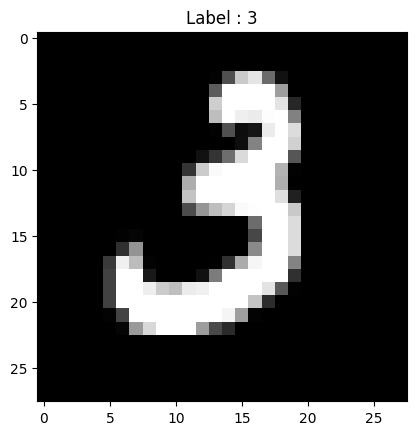

In [185]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(f"Label : {test_labels[0]}")
plt.show()

In [186]:
# Make prediction
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

# View first 2 prediction probabilities
pred_probs[:2]

tensor([[4.6259e-11, 7.2150e-09, 1.1812e-07, 9.9994e-01, 1.5572e-11, 3.8267e-05,
         2.0706e-08, 2.5155e-08, 5.7638e-07, 1.7247e-05],
        [3.2224e-23, 2.2499e-15, 5.1256e-16, 9.9999e-01, 9.0193e-19, 6.1736e-06,
         8.1216e-18, 8.0280e-14, 1.2050e-09, 4.4975e-07]])

In [187]:
# convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([3, 3, 0, 3, 7, 4, 3, 0, 3])

In [188]:
test_labels

[3, 3, 0, 3, 7, 4, 3, 0, 3]

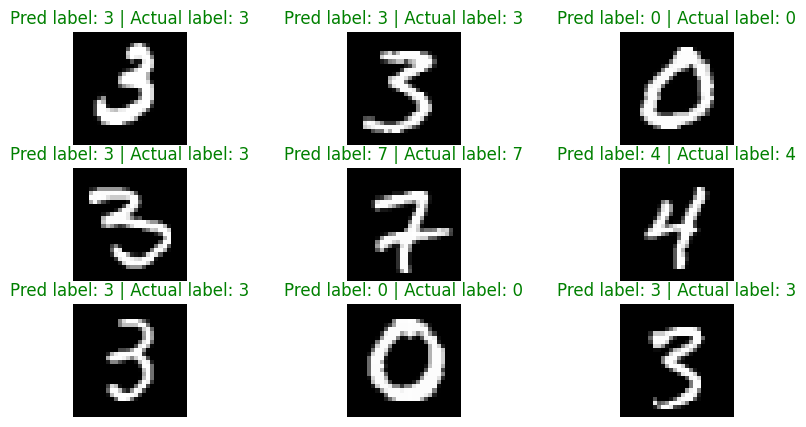

In [189]:
# Plot prediction

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,5))

for i, ax in enumerate(axes.flat):
    img = test_samples[i]

    ax.imshow(img.squeeze(), cmap="gray")

    prediction_labels = pred_classes[i].item()

    testing_labels = test_labels[i]

    if prediction_labels == testing_labels:
        ax.set_title(f"Pred label: {prediction_labels} | Actual label: {testing_labels}", color='green')
    else:
        ax.set_title(f"Pred label: {prediction_labels} | Actual label: {testing_labels}", color='red')

    ax.axis("off")

plt.show()

In [191]:
# import tqdm.auto
from tqdm.auto import tqdm

#1. Make prediction with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making predictions..."):
        # Send the data and targets to target device
        X, y = X.to(device), y.to(device)

        # Do the forward pass
        y_logit = model_2(X)

        # Turn predictions from logits -> prediction probabilities -> prediction labels
        y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)

        # Put prediction on CPU for evaluation
        y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

Making predictions...: 100%|██████████| 313/313 [00:00<00:00, 333.37it/s]


tensor([7, 2, 1,  ..., 4, 5, 6])

In [192]:
len(y_pred_tensor)

10000

In [205]:
class_names = test_data.classes
len(class_names)

10

In [200]:
import torchmetrics, mlxtend

In [201]:
mlxtend.__version__

'0.23.4'

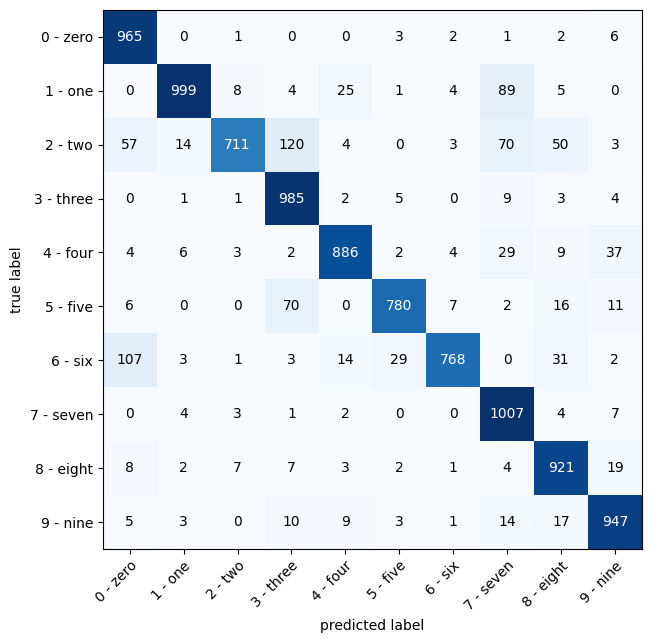

In [207]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(task='multiclass',num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with numpy
    class_names=class_names,
    figsize=(10,7)
)

In [208]:
from pathlib import Path

# Create model directory path
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model save
MODEL_NAME = "pytorch_1st_project_MNIST_digit_classifier.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models\pytorch_1st_project_MNIST_digit_classifier.pth


In [209]:
# Create a new instance
torch.manual_seed(42)

loaded_model_2 = MNISTModel2(in_channels=1,
                             hidden_units=10,
                             num_classes=len(class_names))

# Load in the save state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Sned the model to the target device
loaded_model_2.to(device)

C:\Users\Deepam Shah\AppData\Local\Temp\ipykernel_35564\2649272145.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE

MNISTModel2(
  (conv2d_layer_stack): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=5760, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
  )
)